In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import copy
import matplotlib
matplotlib.rcParams['figure.dpi']= 600
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
import math
from geopy.distance import great_circle
from math import sin, cos, sqrt, atan2, radians
from numpy import *
import hdbscan
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
from sklearn.cluster import KMeans
import json
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns # https://seaborn.pydata.org/api.html

import pylab
from scipy import stats

import requests
import statsmodels.api as sm

In [0]:
# load the data for large scale
rest_group2 = pd.read_pickle('rest_group2_plot')

ls_exit_id_set: each tuple is the list of exit IDs in a large-scale cluster

ls_id_set: each tuple is the list of restaurant IDs in a large-scale cluster

ls_id_corr_set: each tuple is the list of coordinates (['longitude','latitude']) of restaurants in a large-scale cluster

ls_checkin_set: each tuple is the list of restaurant check-ins in a large-scale cluster

dist_haven_avg: each tuple is $d_A$ in a large-scale cluster

ls_checkin_std_mean: each tuple is $f_A$ in a large-scale cluster

ls_id_rating_set: each tuple is the list of restaurant reputations in a large-scale cluster

ls_id_hour_set: each tuple is the list of restaurant weekly hours of operation in a large-scale cluster

ls_id_rating_std_mean: each tuple is $\rho_A$ in a large-scale cluster

ls_id_hour_std_mean: each tuple is $h_A$ in a large-scale cluster

ls_id_set_num: each tuple is $N_A$ in a large-scale cluster

In [0]:
rest_group2.head()

,ls_exit_id_set,ls_id_set,ls_id_corr_set,ls_checkin_set,dist_haven_avg,ls_checkin_std_mean,ls_id_rating_set,ls_id_hour_set,ls_id_rating_std_mean,ls_id_hour_std_mean,ls_id_set_num
0,"[35189, 35181]","[814424, 489010, 408]","[[-75.86490699999999, 40.155956], [-75.86291, ...","[15.2937682, 39.21035881, 11.18818049]",0.245352,0.56428,"[6.5498181818181775, 6.726190476190476, 6.6539...","[84.0, 113.0, 98.0]",0.0108978,0.120423,3
1,"[35184, 35186, 35187, 35183]","[200544, 440896, 814527, 1172235, 306031, 2918...","[[-75.934402, 40.320688], [-75.86049, 40.30623...","[46.22212044, 39.31332557, 32.237198, 80.31206...",5.56032,0.642979,"[5.719666666666667, 7.840625, 6.54981818181817...","[168, 77.0, 97.0, 93.0, 98.0, 105.0, 125.0, 11...",0.120393,0.269236,17
2,"[35524, 35542]","[307096, 189246]","[[-76.83390899999999, 41.242148], [-76.833232,...","[11.79223274, 13.86403663]",0.194131,0.0807523,"[6.653999999999997, 5.598305084745766]","[101.0, 112.0]",0.086163,0.0516432,2
3,"[35528, 35537]","[550616, 814889, 201786]","[[-76.96625999999999, 41.24925], [-76.970506, ...","[23.90637136, 13.37895726, 34.32672631]",0.241772,0.358261,"[6.125174825174826, 6.5498181818181775, 5.7196...","[126.0, 105.0, 168]",0.0552777,0.196929,3
4,"[35536, 35529, 35530]","[201754, 189221]","[[-76.98706, 41.227160999999995], [-76.9929, 4...","[34.37901845, 16.00979062]",2.35482,0.36455,"[5.719666666666667, 5.598305084745766]","[107.0, 120.0]",0.0107229,0.0572687,2


In [0]:
# load the data for small scale
rest_very_small = pd.read_pickle('rest_very_small')

dist: each tuple is $d_A$ in a small-scale cluster
    
hour_std_mean: each tuple is $h_A$ in a small-scale cluster

rating_std_mean: each tuple is $\rho_A$ in a small-scale cluster

std_mean: each tuple is $f_A$ in a small-scale cluster

cluster_num: each tuple is $N_A$ in a small-scale cluster

In [0]:
rest_very_small.head()

,dist,hour_std_mean,rating_std_mean,std_mean,cluster_num
0,2.892297,0.178297,0.031024,0.562359,4
1,0.063255,0.092958,0.057277,0.345882,2
2,0.416744,0.140087,0.059218,0.465699,4
3,0.231794,0.156118,0.089537,0.274514,3
4,0.101756,0.121076,0.078326,0.045810,2


# Regression results of large scale

## $f_A$ ~ $d_A$

In [0]:
# generate regression results for large scale $f_A$ ~ $d_A$
X=rest_group2[['dist_haven_avg']]
y=rest_group2['ls_checkin_std_mean']
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y.astype(float),X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ls_checkin_std_mean   R-squared:                       0.108
Model:                             OLS   Adj. R-squared:                  0.102
Method:                  Least Squares   F-statistic:                     17.84
Date:                 Wed, 06 Feb 2019   Prob (F-statistic):           4.17e-05
Time:                         10:02:45   Log-Likelihood:                 28.806
No. Observations:                  150   AIC:                            -53.61
Df Residuals:                      148   BIC:                            -47.59
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3806      0.025     15.124      0.000       0.331       0.430
dist_haven_avg     0.0402      0.010      4.224      0.000       0.021       0.059
==============================================================================
Omnibus:                        1.313   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                1.164
Skew:                           0.003   Prob(JB):                        0.559
Kurtosis:                       2.568   Cond. No.                         4.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## $f_A$ ~ $d_A$ + $\rho_A$ + $h_A$ + $N_A$

In [0]:
# generate regression results for large scale $f_A$ ~ $d_A$ + $ρ_A$ + $h_A$ + $N_A$
X=rest_group2[['dist_haven_avg','ls_id_rating_std_mean','ls_id_hour_std_mean','ls_id_set_num']]
y=rest_group2['ls_checkin_std_mean']
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y.astype(float),X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ls_checkin_std_mean   R-squared:                       0.345
Model:                             OLS   Adj. R-squared:                  0.327
Method:                  Least Squares   F-statistic:                     19.12
Date:                 Wed, 06 Feb 2019   Prob (F-statistic):           1.19e-12
Time:                         10:02:47   Log-Likelihood:                 52.044
No. Observations:                  150   AIC:                            -94.09
Df Residuals:                      145   BIC:                            -79.03
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1658      0.043      3.845      0.000       0.081       0.251
dist_haven_avg            0.0170      0.010      1.760      0.081      -0.002       0.036
ls_id_rating_std_mean     1.7273      0.432      4.000      0.000       0.874       2.581
ls_id_hour_std_mean       0.3870      0.115      3.356      0.001       0.159       0.615
ls_id_set_num             0.0060      0.002      2.756      0.007       0.002       0.010
==============================================================================
Omnibus:                        3.067   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.566
Skew:                           0.282   Prob(JB):                        0.277
Kurtosis:                       3.305   Cond. No.                         336.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression visualization of large scale

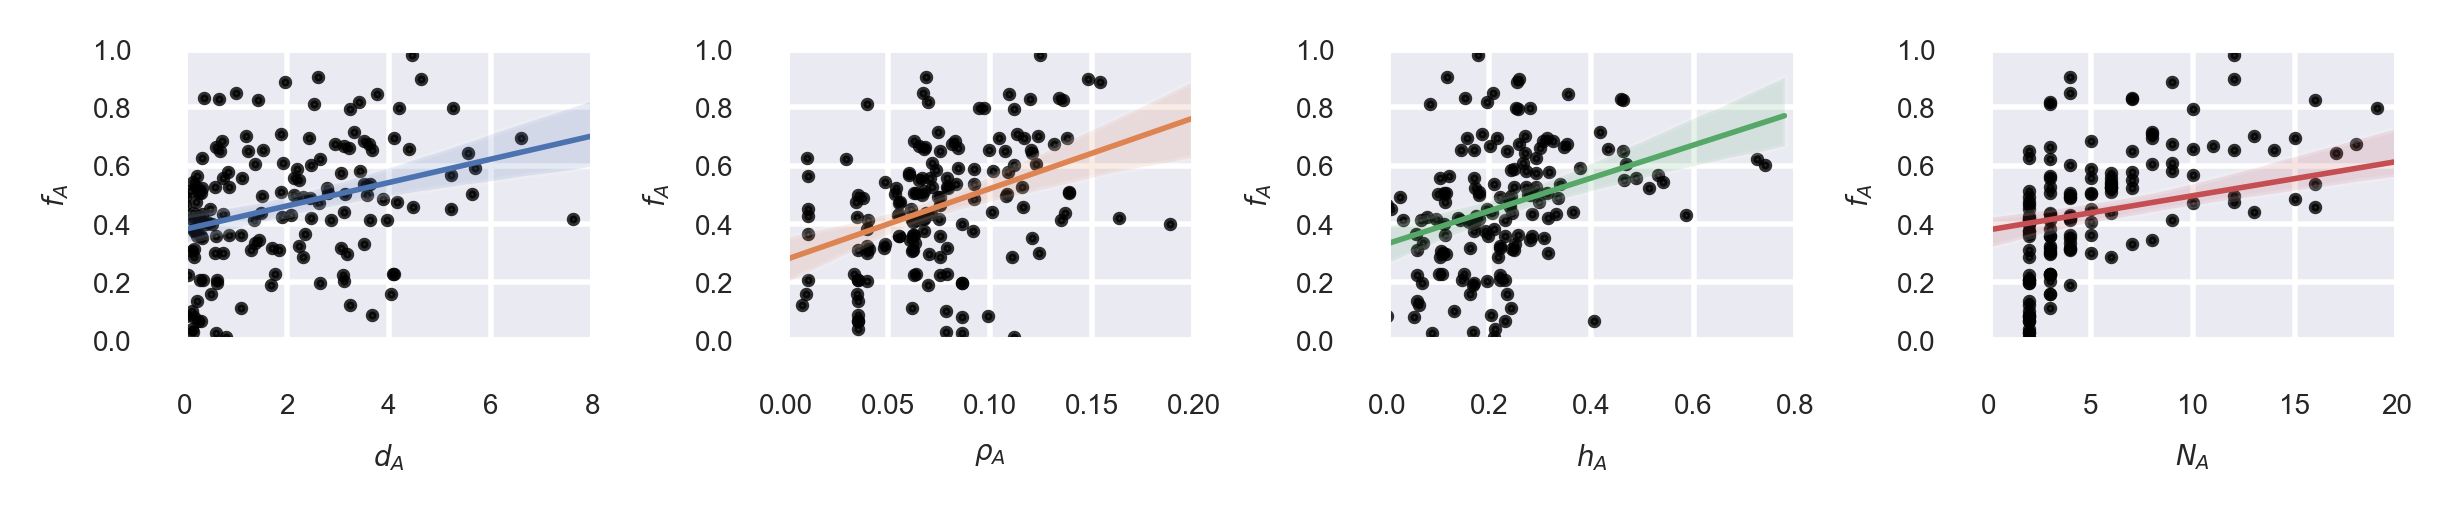

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(441)
ax2 = fig.add_subplot(442)
ax3 = fig.add_subplot(443)
ax4 = fig.add_subplot(444)

# Tell pointplot to plot on ax1, ax2, ax3, ax4 with the ax argument
sns.regplot(x=rest_group2['dist_haven_avg'].astype(float),y=rest_group2['ls_checkin_std_mean'].astype(float), scatter_kws={"color": "black",'s':2}, line_kws={'lw':1}, ax=ax1)
sns.regplot(x=rest_group2['ls_id_rating_std_mean'].astype(float),y=rest_group2['ls_checkin_std_mean'].astype(float), scatter_kws={"color": "black",'s':2}, line_kws={'lw':1}, ax=ax2)
sns.regplot(x=rest_group2['ls_id_hour_std_mean'].astype(float),y=rest_group2['ls_checkin_std_mean'].astype(float), scatter_kws={"color": "black",'s':2}, line_kws={'lw':1}, ax=ax3)
sns.regplot(x=rest_group2['ls_id_set_num'].astype(float),y=rest_group2['ls_checkin_std_mean'].astype(float), scatter_kws={"color": "black",'s':2}, line_kws={'lw':1}, ax=ax4)

ax1.set_ylabel('$f_A$', fontsize = 5) # Y label
ax1.set_xlabel('$d_A$', fontsize = 5) # X label
ax1.xaxis.set_tick_params(labelsize=5)
ax1.yaxis.set_tick_params(labelsize=5)
ax1.set_xlim([0, 8])
ax1.set_ylim([0, 1])

ax2.set_ylabel('$f_A$', fontsize = 5) # Y label
ax2.set_xlabel('$ρ_A$', fontsize = 5) # X labe
ax2.xaxis.set_tick_params(labelsize=5)
ax2.yaxis.set_tick_params(labelsize=5)
ax2.set_xlim([0, 0.2])
ax2.set_ylim([0, 1])

ax3.set_ylabel('$f_A$', fontsize = 5) # Y label
ax3.set_xlabel('$h_A$', fontsize = 5) # X labe
ax3.xaxis.set_tick_params(labelsize=5)
ax3.yaxis.set_tick_params(labelsize=5)
ax3.set_xlim([0, 0.8])
ax3.set_ylim([0, 1])

ax4.set_ylabel('$f_A$', fontsize = 5) # Y label
ax4.set_xlabel('$N_A$', fontsize = 5) # X labe
ax4.xaxis.set_tick_params(labelsize=5)
ax4.yaxis.set_tick_params(labelsize=5)
ax4.set_xlim([0, 20])
ax4.set_ylim([0, 1])


plt.tight_layout()
plt.show()

# Regression results of small scale

## $f_A$ ~ $d_A$

In [0]:
# generate regression results for small scale $f_A$ ~ $d_A$
X=rest_very_small[['dist']]
y=rest_very_small['std_mean']
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y.astype(float),X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               std_mean   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.170
Date:                Wed, 06 Feb 2019   Prob (F-statistic):             0.0762
Time:                        10:02:57   Log-Likelihood:                 46.505
No. Observations:                 256   AIC:                            -89.01
Df Residuals:                     254   BIC:                            -81.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3399      0.017     20.330      0.000       0.307       0.373
dist           0.0337      0.019      1.780      0.076      -0.004       0.071
==============================================================================
Omnibus:                        7.089   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.212
Skew:                           0.228   Prob(JB):                       0.0738
Kurtosis:                       2.470   Cond. No.                         2.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## $f_A$ ~ $d_A$ + $\rho_A$ + $h_A$ + $N_A$

In [0]:
# generate regression results for small scale $f_A$ ~ $d_A$ + $ρ_A$ + $h_A$ + $N_A$
X=rest_very_small[['dist','rating_std_mean','hour_std_mean','cluster_num']]
y=rest_very_small['std_mean']
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y.astype(float),X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               std_mean   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     20.90
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           6.89e-15
Time:                        10:02:59   Log-Likelihood:                 81.722
No. Observations:                 256   AIC:                            -153.4
Df Residuals:                     251   BIC:                            -135.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1112      0.030      3.734      0.000       0.053       0.170
dist                0.0092      0.017      0.536      0.592      -0.025       0.043
rating_std_mean     1.0881      0.299      3.640      0.000       0.499       1.677
hour_std_mean       0.0524      0.067      0.785      0.433      -0.079       0.184
cluster_num         0.0565      0.010      5.606      0.000       0.037       0.076
==============================================================================
Omnibus:                        5.418   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.006
Skew:                           0.282   Prob(JB):                       0.0818
Kurtosis:                       2.610   Cond. No.                         90.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression visualization of small scale

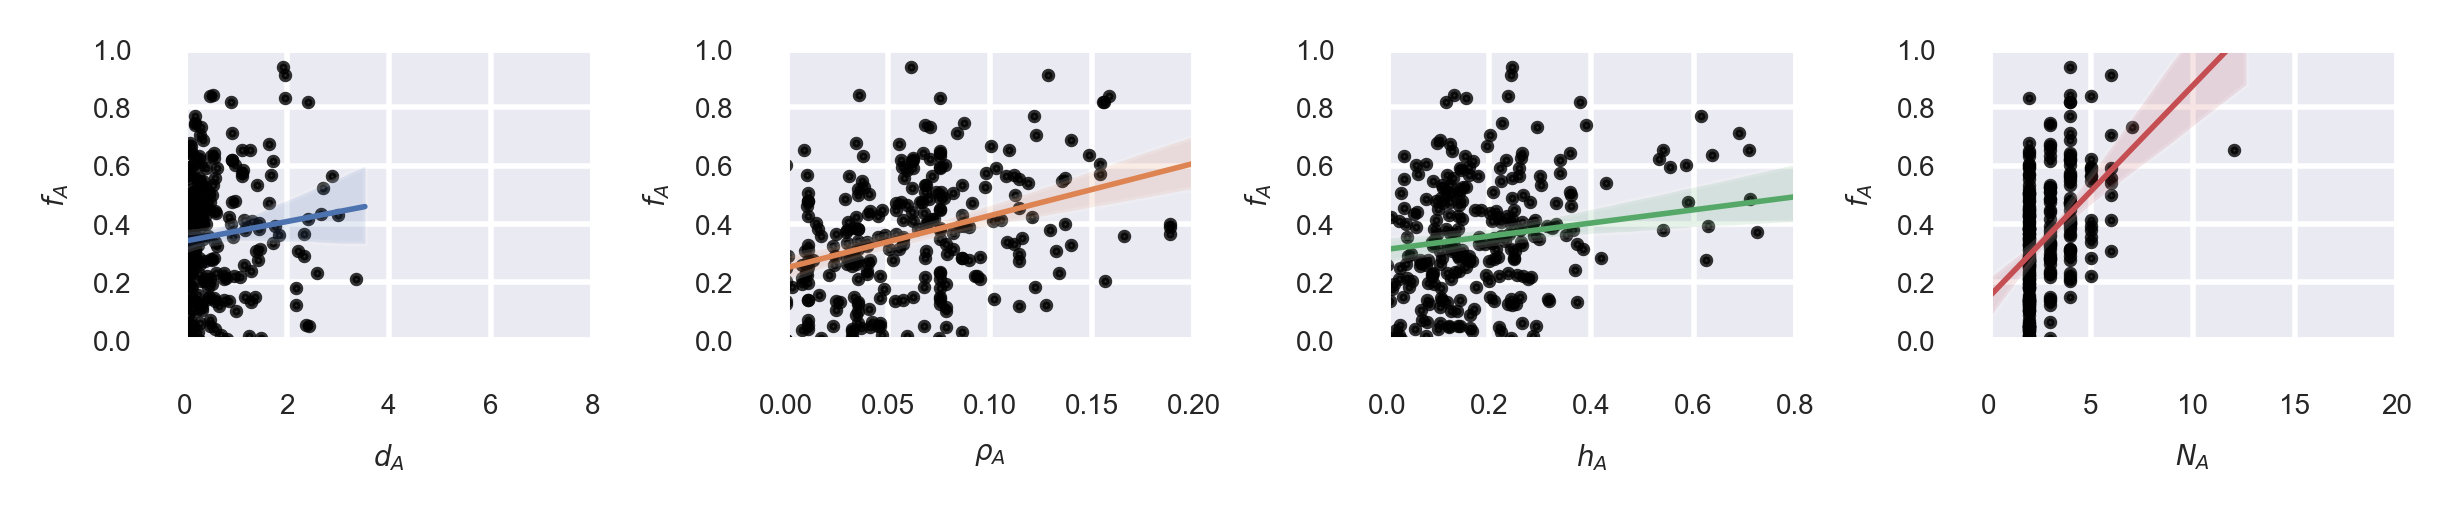

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(441)
ax2 = fig.add_subplot(442)
ax3 = fig.add_subplot(443)
ax4 = fig.add_subplot(444)

# Tell pointplot to plot on ax1, ax2, ax3, ax4 with the ax argument
sns.regplot(x=rest_very_small['dist'].astype(float),y=rest_very_small['std_mean'].astype(float), scatter_kws={"color": "black",'s':2}, line_kws={'lw':1}, ax=ax1)
sns.regplot(x=rest_very_small['rating_std_mean'].astype(float),y=rest_very_small['std_mean'].astype(float), scatter_kws={"color": "black",'s':2}, line_kws={'lw':1}, ax=ax2)
sns.regplot(x=rest_very_small['hour_std_mean'].astype(float),y=rest_very_small['std_mean'].astype(float), scatter_kws={"color": "black",'s':2}, line_kws={'lw':1}, ax=ax3)
sns.regplot(x=rest_very_small['cluster_num'].astype(float),y=rest_very_small['std_mean'].astype(float), scatter_kws={"color": "black",'s':2}, line_kws={'lw':1}, ax=ax4)


ax1.set_ylabel('$f_A$', fontsize = 5) # Y label
ax1.set_xlabel('$d_A$', fontsize = 5) # X label
ax1.xaxis.set_tick_params(labelsize=5)
ax1.yaxis.set_tick_params(labelsize=5)
ax1.set_xlim([0, 8])
ax1.set_ylim([0, 1])

ax2.set_ylabel('$f_A$', fontsize = 5) # Y label
ax2.set_xlabel('$ρ_A$', fontsize = 5) # X labe
ax2.xaxis.set_tick_params(labelsize=5)
ax2.yaxis.set_tick_params(labelsize=5)
ax2.set_xlim([0, 0.2])
ax2.set_ylim([0, 1])

ax3.set_ylabel('$f_A$', fontsize = 5) # Y label
ax3.set_xlabel('$h_A$', fontsize = 5) # X labe
ax3.xaxis.set_tick_params(labelsize=5)
ax3.yaxis.set_tick_params(labelsize=5)
ax3.set_xlim([0, 0.8])
ax3.set_ylim([0, 1])

ax4.set_ylabel('$f_A$', fontsize = 5) # Y label
ax4.set_xlabel('$N_A$', fontsize = 5) # X labe
ax4.xaxis.set_tick_params(labelsize=5)
ax4.yaxis.set_tick_params(labelsize=5)
ax4.set_xlim([0, 20])
ax4.set_ylim([0, 1])


plt.tight_layout()
plt.show()